In [1]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#eta =A \bar{p}/\rho is the term in the conservation law
#H = \eta/{g A} is the pressure head in meters (I'm going to report this)

In [3]:
fi = "../indata/trajkovic.inp"
fc = "../indata/trajkovic.config"
fc2 = "../indata/trajkovic2.config"
ww=5
mtype = 1
n1 = PyNetwork(fi,fc,mtype)

M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T1 =n1.T
D = n1.Ds[0]
p1 = PyPipe_ps(N, D, L, M, a)
dt = T1/M
e0 = 0.015 #choices are 0.008 or 0.015

In [4]:
n1.runForwardProblem(dt)

In [5]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)
#b0= e0*2.*np.arctan(np.linspace(0,100,M+1))/np.pi
print n1.Ds[0]**2*np.pi/4.
n5 = 79*2  #assuming 10 m pipe
n7 = 96*2
#assuming 8.1 m stretch of pipe
#n5 = int(5.7/8.1*200)#original measure
n5 = int(5.6/8.1*200)
n7 = int(7.6/8.1*200)
dx = n1.Ls[0]/n1.Ns[0]
print n7
n7 = 187
P52 = []
P72 = []
print .5/8.1*.027
g = 9.8
print n1.Ls
print 8.1-5.6

0.00785398163397
187
0.00166666666667
[ 8.1]
2.5


In [6]:
def idx_t(i,j,n):
    return (2*(N+2)*n+(N+2)*i+j)

In [7]:
n2 = PyNetwork(fi, fc2, mtype)
M2 = n2.M
b0= e0*np.ones(M+1)
n2.setbVal(1,b0);
n2.setIC(0,q[0:N],q[N:])
n2.runForwardProblem(dt)
qhist2 = n2.qhist(0)
P52=[p1.Eta(qhist2[idx_t(0,n5,n)], False)/(g*qhist2[idx_t(0,n5,n)]) for n in range(M2+1)]
P72=[p1.Eta(qhist2[idx_t(0,n7,n)], False)/(g*qhist2[idx_t(0,n7,n)]) for n in range(M2+1)]

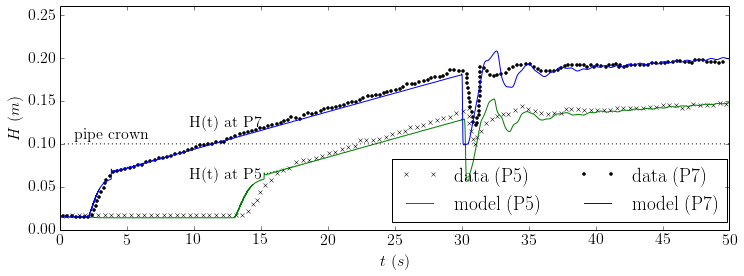

In [8]:
from matplotlib import rc
rc('text', usetex=True)        #for tex rendering. 
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 
                                'monospace': ['Computer Modern Typewriter'], 'size'   : 16})
rc('font', family='serif')     #for pretty font 
fname5='../indata/trajkovic_data/trajkovicp%de0_%1.3f.txt'% (5,e0)
fname7 = '../indata/trajkovic_data/trajkovicp%de0_%1.3f.txt'% (7,e0)
M2 = n2.M
T2 = n2.T
T1 = n1.T
t1 = linspace(0,T1, M+1)
t2 = linspace(T1,T1+T2,M2+1)
t = np.concatenate((t1,t2))


P71 = [p1.Eta(qhist[idx_t(0,n7,n)],True)/(g*qhist[idx_t(0,n7,n)]) for n in range(M+1)]
P51 = [p1.Eta(qhist[idx_t(0,n5,n)],True)/(g*qhist[idx_t(0,n5,n)]) for n in range(M+1)]


import csv
t5 =[]
p5 = []
t7 =[]
p7 = []
c5 = csv.reader(open(fname5,'rb'))
c7 = csv.reader(open(fname7,'rb'))

for line in c5:
    t5.append(float(line[0]))
    p5.append(float(line[1]))
for line in c7:
    t7.append(float(line[0]))
    p7.append(float(line[1]))

pnew7 = np.array(P71+P72)
pnew5 = np.array(P51+P52)

z05 = float(n1.Ns[0]-n5)/n1.Ns[0]*.027*n1.Ls[0]-0.005
z07 = float(n1.Ns[0]-n7)/n1.Ns[0]*.027*n1.Ls[0]-0.005
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(0,50)
ax.set_ylim(0,.26)
ax.set_xticks(np.linspace(0,50,11))
ax.set_yticks(np.linspace(0,0.25,6))
g = 9.8
sp =7
#z0 = .0135 (why did I do this)
ax.plot(t5[0::sp],p5[0::sp],'kx', ms=4,)
ax.plot(t,pnew5+z07,'g',lw=1)
ax.plot(t7[0::sp],p7[0::sp],'ko', ms=3)
ax.plot(t,pnew7+z07, 'b', lw = 1)
#ax.grid(True)
ax.set_ylabel(r'$H$ $(m)$',size = 16)
ax.set_xlabel(r'$t$ $(s)$',size = 16)
legend(["data (P5)" ,"model (P5)","data (P7)" ,"model (P7)"], loc = 'lower right',bbox_to_anchor=(1.01,-.01), ncol = 2)
ax.plot(t,.1*np.ones(size(t)), 'k:')
plt.annotate(
    r"H(t) at P7", xy=(9, 0.12), xycoords='data',
    xytext=(9, 0.12), textcoords='offset points',size = 16)
plt.annotate(
    r"H(t) at P5", xy=(9, 0.06), xycoords='data',
    xytext=(9, 0.06), textcoords='offset points',size = 16)
#plt.annotate(
#    r"$e_0$=%.3f"%e0, xy=(1, 0.24), xycoords='data',
#    xytext=(1, 0.24), textcoords='offset points')
plt.annotate(
    r"pipe crown", xy=(1, 0.105), xycoords='data',
    xytext=(1, 0.105), textcoords='offset points',size = 16)
#savefig( "../exampledatae0_%03.0f.eps"%(e0*1000), format='eps')
